_본 노트북은 [텐서플로우 코리아 블로그](https://tensorflowkorea.wordpress.com)의 [First Contact with TensorFlow](http://www.jorditorres.org/TensorFlow/) 책의 [번역본](https://tensorflowkorea.wordpress.com/2016/04/28/first-contact-with-tensorflow/)을 코드를 직접 실행이 가능하도록 복사하여 옮긴 것입니다. 원본 및 번역본의 [라이센스 정책](https://creativecommons.org/licenses/by-nc-sa/3.0/)에 따라 공개 및 공유합니다._

3. 텐서플로우 클러스터링
====

이전 장에서 살펴 본 선형 회귀분석은 모델을 만들기 위해 입력 데이터와 출력 값(혹은 레이블, label)을 사용했다는 점에서 감독(supervised) 학습 알고리즘입니다. 하지만 모든 데이터에 레이블이 있는 것은 아닙니다. 그렇지만 이런 경우에도 어떻게든 분석을 해야합니다. 이럴 때 클러스터링(clustering, 군집화)이라는 비감독(unsupervised) 학습 알고리즘을 사용할 수 있습니다. 클러스터링은 데이터 분석의 사전 작업으로 사용되기 좋아 널리 이용되는 방법입니다.

이 장에서는 K-means 클러스터링 알고리즘을 소개합니다. K-means 알고리즘은 데이터를 다른 묶음과 구분되도록 유사한 것끼리 자동으로 그룹핑해 주기 때문에 가장 많이 알려졌고 널리 사용됩니다. 이 알고리즘에서는 예측해야 할 타겟 변수나 결과 변수가 없습니다.

또 이번 장에서는 텐서플로우에 대해 더 알기 위해 텐서(tensor)라 불리는 기본 데이터 구조에 대해 자세히 살펴 보겠습니다. 텐서 데이터가 어떤 것인지 먼서 설명하고 제공되는 기능에 대해 소개하겠습니다. 그리고 나서 텐서를 이용하여 K-means 알고리즘을 예제로 풀어보도록 하겠습니다.

기본 데이터 구조: 텐서(tensor)
----

텐서플로우는 텐서라는 기본 데이터 구조로 모든 데이터들을 표현합니다. 텐서는 동적 사이즈를 갖는 다차원 데이터 배열로 볼 수 있으며 불리언(boolean), 문자열(string)이나 여러 종류의 숫자형 같은 정적 데이터 타입을 가집니다. 아래는 주요 데이터 타입과 이에 대응하는 파이썬의 타입에 대한 표입니다.

| 텐서플로우 타입 | 파이썬 타입 | 설명 |
|-------------|----------|-----|
| DT_FLOAT | tf.float32 | 32비트 실수 |
| DT_INT16 | tf.int16 | 16비트 정수 |
| DT_INT32 | tf.int32 | 32비트 정수 |
| DT_INT64 | tf.int64 | 64비트 정수 |
| DT_STRING | tf.string | 문자열 |
| DT_BOOL | tf.bool | 불리언 |

그리고 각 텐서는 배열의 차원을 나타내는 랭크(rank)를 가집니다. 예를 들면 다음의 텐서(파이썬에서 list로 표현된)는 랭크 2를 가집니다.

t = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

텐서의 랭크에는 제한이 없습니다. 랭크 2인 텐서는 행렬을 나타내며 랭크 1인 텐서는 벡터로 볼 수 있습니다. 랭크 0 텐서는 스칼라(scalar) 값이 됩니다.

텐서플로우의 공식 문서에서는 텐서의 차원을 표현하기 위해 구조(Shape), 랭크(Rank), 차원번호(Dimension Number) 라는 세가지 종류의 이름을 사용합니다. 아래 테이블은 텐서플로우 문서를 볼 때 혼돈되지 않도록 각 이름 사이의 관계를 나타냈습니다.

| 구조(SHAPE) | 랭크(RANK) | 차원번호(DIMENSION NUMBER) |
|------------|-----------|--------------------------|
| [] | 0 | 0-D |
| [D0] | 1 | 1-D |
| [D0, D1] | 2 | 2-D |
| [D0, D1, D2] | 3 | 3-D |
| … | … | … |
| [D0, D1, … Dn] | n | n-D |

텐서들을 다루기 위해 텐서플로우에서 제공하는 일련의 변환 함수를 사용합니다. 그 중 일부를 아래 테이블에 나열했습니다.

이 장을 진행하면서 아래 중 일부 함수에 대해 자세히 설명하겠습니다. 변환 함수의 전체 목록과 설명은 텐서플로우 공식 웹사이트의 텐서 변환(Tensor Transformations)에서 찾을 수 있습니다.

| 함수 | 설명 |
|-----|-----|
| tf.shape | 텐서의 구조를 알아냅니다. |
| tf.size | 텐서의 크기를 알아냅니다. |
| tf.rank | 텐서의 랭크를 알아냅니다. |
| tf.reshape | 텐서의 엘리먼트(element)는 그대로 유지하면서 텐서의 구조를 바꿉니다. |
| tf.squeeze | 텐서에서 크기가 1인 차원을 삭제합니다. |
| tf.expand_dims | 텐서에 차원을 추가합니다. |
| tf.slice | 텐서의 일부분을 삭제합니다. |
| tf.split | 텐서를 한 차원을 기준으로 여러개의 텐서로 나눕니다. |
| tf.tile | 한 텐서를 여러번 중복으로 늘려 새 텐서를 만듭니다. |
| tf.concat | 한 차원을 기준으로 텐서를 이어 붙입니다. |
| tf.reverse | 텐서의 지정된 차원을 역전시킵니다. |
| tf.transpose | 텐서를 전치(transpose)시킵니다. |
| tf.gather | 주어진 인덱스에 따라 텐서의 엘리먼트를 모읍니다. |

예를 들어, 2×2000 배열(2D 텐서)을 3차원 배열(3D 텐서)로 확장하고 싶다면 tf.expand_dims 함수를 사용하여 텐서의 원하는 위치에 차원을 추가할 수 있습니다.

```python
vectors = tf.constant(conjunto_puntos)
extended_vectors = tf.expand_dims(vectors, 0)
```

여기서 tf.expand_dims 은 파라메타로 지정된 텐서의 위치(0부터 가능)에 하나의 차원을 추가하였습니다.(역주: 2차원 텐서의 경우 지정할 수 있는 차원은 0, 1 입니다)

위 변환 과정을 그림으로 보면 아래와 같습니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image023.gif?w=230&h=422)

그림에서 볼 수 있듯이 우리는 이제 3D 텐서를 얻었습니다. 하지만 함수의 인자로 전달하는 새로운 차원인 D0에 크기를 지정할 수는 없습니다.

get_shape() 함수로 이 텐서의 크기를 확인하면 D0에는 크기가 없다는 걸 알 수 있습니다.

```python
print expanded_vectors.get_shape()
```

아래와 같은 결과를 얻습니다.(역주: 최신 텐서플로우에서는 크기가 지정되어 있지 않은 차원이 Dimension(1)이 아니라 Dimension(None)으로 표시됩니다.)

```
TensorShape([Dimension(1), Dimension(2000), Dimension(2)])
```

이 장의 후반부에 보게 되겠지만 텐서플로우의 텐서 구조 전파(shape broadcasting) 기능 덕에 텐서를 다루는 많은 수학 함수들(1장에서 소개된)은 사이즈가 없는 차원을 스스로 인식하고 가능한 값을 추측하여 사이즈를 결정하게 합니다.

텐서플로우의 데이터 저장소(Storage)
----

텐서플로우 패키지의 소개에 따르면 대체로 텐서플로우 프로그램에서 데이터를 얻는 방법은 세가지가 있습니다.

1. 데이터 파일로 부터 얻은 데이터
2. 상수나 변수로 미리 로드한 데이터
3. 파이썬 코드에 의해 제공된 데이터

아래에 각각에 대해 간단하게 설명합니다.

### 1. 데이터파일

보통 초기 데이터는 데이터 파일에서 얻어집니다. 이 작업이 복잡하진 않지만 이 책이 입문서이므로 여러 종류의 파일에서 부터 데이터를 어떻게 추출하는 지는 텐서플로우 웹사이트를 참고해 주세요. 이 책의 깃허브에 있는 MNIST 데이터를 파일에서 로드하는 input_data.py 파일(이 파일은 다음장에서 사용하게 됩니다)을 참고할 수도 있습니다.

### 2. 변수와 상수

크기가 크지 않은 경우 메모리에 데이터를 미리 로드할 수도 있습니다. 이전 예제에서 보았듯이 두가지 기본적인 방법이 있습니다.

* constant(…)를 사용한 상수 생성
* Variable(…)을 사용한 변수 생성

텐서플로우 패키지는 상수를 생성할 수 있는 여러가지 도구를 제공합니다. 아래 테이블에 제일 중요한 것들을 요약하였습니다.

| 함수 | 설명 |
|-----|-----|
| tf.zeros_like | 모든 엘리먼트를 0으로 초기화한 텐서를 생성합니다. |
| tf.ones_like | 모든 엘리먼트를 1로 초기화한 텐서를 생성합니다. |
| tf.fill | 주어진 스칼라(scalar) 값으로 엘리먼트를 초기화한 텐서를 생성합니다. |
| tf.constant | 함수 인자로 지정된 값을 이용하여 상수 텐서를 생성합니다. |

텐서플로우에서 모델을 학습하는 동안에는 모델 파라메타들은 메모리에 변수로 관리됩니다. 변수를 생성할 때 함수 파라메타로상수나 임의의 값으로 초기값을 지정할 수 있습니다. 텐서플로우는 여러가지 분포 별로 임의의 텐서를 생성하는 함수를 제공합니다.

| 함수 | 설명 |
|-----|-----|
| tf.random_normal | 정규 분포 형태의 갖는 난수 텐서를 생성합니다. |
| tf.truncated_normal | 정규 분포 형태의 난수 텐서를 생성합니다. 다만 2표준편차 범위 밖의 값을 제거합니다. |
| tf.random_uniform | 균등 분포 형태의 난수 텐서를 생성합니다. |
| tf.random_shuffle | 첫번째 차원을 기준으로 하여 텐서의 엘리먼트를 섞습니다. |
| tf.set_random_seed | 난수 시드(seed)를 제공합니다. |

이 함수들은 파라메타로 생성할 텐서의 차원의 크기를 입력 받아야 합니다. 일반적으로 변수는 고정된 크기를 가지지만 필요에 따라 텐서플로우에서 크기를 바꿀 수 있는 기능을 제공합니다.

변수를 사용하려면 데이터 그래프를 구성한 후 run() 함수를 실행하기 전에 반드시 초기화해야 합니다. 위에서 보았던 tf.initialize_all_variables()가 이 역할을 담당합니다. 변수는 모델을 훈련 시키는 동안이나 훈련 후에 tf.train.Saver() 클래스를 이용하여 디스크에 저장할 수 있습니다만 이 클래스에 대한 것은 이 책의 범위를 벗어납니다.

### 3. 파이썬 코드로 제공

마지막으로 프로그램 실행 중에 데이터를 변경하기 위해서 ‘심볼릭 변수’ 또는 플레이스홀더(placeholder)라 불리는 것을 사용할 수 있습니다. placeholder() 함수는 엘리먼트의 타입과 텐서의 크기 그리고 선택적으로 이름을 파라메타로 받습니다.

파이썬 코드에서 Session.run() 또는 Tensor.eval() 메소드를 호출할 때 feed_dict 파라메타로 플레이스홀더를 지정하여 전달할 수 있습니다. 1창의 첫 예제를 참고해 주세요.

```python
import tensorflow as tf
a = tf.placeholder("float")
b = tf.placeholder("float")
y = tf.mul(a, b)
sess = tf.Session()
print   sess.run(y, feed_dict={a: 3, b: 3})
```

마지막 코드 라인에서 sess.run() 이 호출될 때 텐서 a, b 두개를 feed_dict 파라메타를 통해 전달 시켰습니다.

텐서에 관해 짧게 소개를 했는데 독자들이 앞으로의 예제 코드를 어려움없이 따라 갈 수 있길 바랍니다.

K-means 알고리즘
----

K-means는 클러스터링 문제를 풀기위한 비감독 알고리즘입니다. 이 알고리즘은 간단한 방법으로 주어진 데이터를 지정된 클러스터 갯수(k)로 그룹핑합니다. 한 클러스터 내의 데이터들은 동일한 성질을 가지며 다른 그룹에 대하여 구별됩니다. 즉 한 클러스터 내의 모든 엘리먼트들은 클러스터 밖의 데이터 보다 서로 더 닮아 있습니다.

알고리즘의 결과는 센트로이드(centroid)라 불리는 K개의 포인트로서 서로 다른 그룹의 중심을 나타내며 데이터들은 K 클러스터 중 하나에만 속할 수 있습니다. 한 클러스터 내의 모든 데이터들은 다른 센트로이드 보다 자신의 센트로이드와의 거리가 더 가깝습니다.

클러스터를 구성하는 데 직접 에러 함수를 최소화하려면 계산 비용이 매우 많이 듭니다.(NP-hard 문제로 알려져 있음) 그래서 스스로 로컬 최소값에 빠르게 수렴할 수 있는 방법들이 개발되어 왔습니다. 가장 널리 사용되는 방법은 몇번의 반복으로 수렴이 되는 반복 개선(iterative refinement) 테크닉 입니다.

대체적으로 이 테크닉은 세개의 단계를 가집니다.

* 초기 단계(step 0): K 센트로이드의 초기 값을 결정한다.
* 할당 단계(step 1): 가까운 클러스터에 데이터를 할당한다.
* 수정 단계(step 2): 각 클러스터에 대해 새로운 센트로이드를 계산한다.

K개 센트로이드의 초기 값을 정하는 방법에는 몇가지가 있습니다. 그 중 하나는 데이터 중 K 개를 임의로 선택하여 센트로이드로 삼는 것 입니다. 우리 예제에서는 이 방법을 사용하겠습니다.

할당 단계와 수정 단계는 알고리즘이 수렴되어서 클러스터 내의 데이터의 변화가 없을 때 까지 루프 안에서 반복됩니다.

이 알고리즘은 휴리스틱한 방법이므로 진정한 최적값으로 수렴한다는 보장은 없으며 결과는 초기 센트로이드를 어떻게 정했는지에 영향을 받습니다. 일반적으로 이 알고리즘의 속도는 매우 빠르므로 초기 센트로이드를 바꿔 가면서 여러번 알고리즘을 수행하여 최종 결과를 만들도록 합니다.

텐서플로우에서 K-means 예제를 시작하기 위해 먼저 샘플 데이터를 생성합니다. 결과 값을 그럴싸하게 만들기 위해 두개의 정규분포를 이용하여 2D 좌표계에 2000개의 포인트를 난수로 발생시킵니다. 아래 코드를 참고하세요.

In [1]:
import numpy as np

num_puntos = 2000
conjunto_puntos = []
for i in xrange(num_puntos):
    if np.random.random() > 0.5:
        conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

이전 장에서 파이썬 그래픽 라이브러리를 사용하여 그래프를 그렸습니다. 이전에는 matplotlib을 사용했는데 여기서는 matplotlib 기반으로 하고 있는 Seaborn 패키지와 좀 더 복잡한 형태의 데이터를 다루기 위해 pandas 패키지를 사용하겠습니다.

만약 이 패키지들이 설치되어 있지 않다면 아래 코드를 따라하기 전에 pip 명령으로 설치하셔야 합니다.(역주: 아나콘다 패키지를 사용하실 경우에는 matplotlib, pandas는 이미 설치되어 있습니다. seaborn은 conda install seaborn 명령으로 설치하실 수 있습니다.)

발생된 난수 데이터를 그래프로 보려면 아래 코드를 참고하세요.

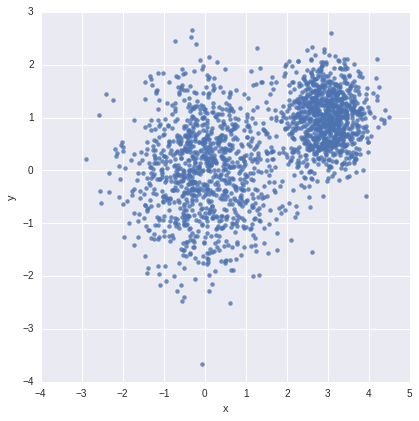

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
                   "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

텐서플로우에서 위 데이터를 4개의 클러스터로 그룹핑하는 K-means 알고리즘 구현 코드는 아래와 같습니다.(Shawn Simister의 블로그에 올라온 모델을 참고했습니다)

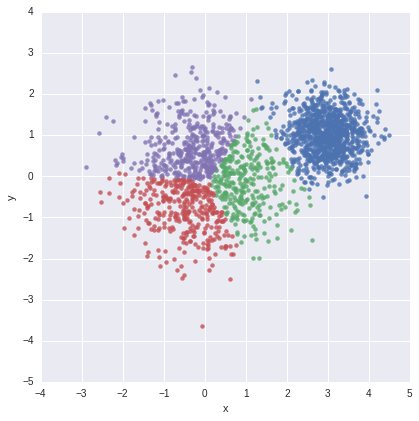

In [3]:
import tensorflow as tf
import numpy as np

def all_in_one():
    vectors = tf.constant(conjunto_puntos)
    k = 4
    centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [k, -1]))

    expanded_vectors = tf.expand_dims(vectors, 0)
    expanded_centroides = tf.expand_dims(centroides, 1)

    assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2), 0)

    means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])),
                                         reduction_indices=[1])
                          for c in xrange(k)])

    update_centroides = tf.assign(centroides, means)

    init_op = tf.initialize_all_variables()

    sess = tf.Session()
    sess.run(init_op)

    for step in xrange(100):
        _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

    # 결과를 확인하기 위해 산점도 그래프를 그리려면 아래 코드처럼 assignment_values 텐서를 이용해서 그립니다.

    data = {"x": [], "y": [], "cluster": []}

    for i in xrange(len(assignment_values)):
        data["x"].append(conjunto_puntos[i][0])
        data["y"].append(conjunto_puntos[i][1])
        data["cluster"].append(assignment_values[i])

    df = pd.DataFrame(data)
    sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
    plt.show()

all_in_one()

그룹 업데이트
----

앞 섹션의 K-means 알고리즘 코드 때문에 조금 어려워 할 수 있을거라 생각합니다. 여기서 자세히 단계별로 살펴 보겠습니다. 특별히 텐서들이 어떻게 프로그램 중에 변경되는지 주의 기울여서 보겠습니다.

첫번째 할 일은 샘플 데이터를 텐서로 바꾸는 것입니다. 무작위로 생성한 데이터를 가지고 상수 텐서를 만듭니다.

In [4]:
vectors = tf.constant(conjunto_puntos)

이전 섹션에서 언급한 알고리즘 대로 처음 시작할 때 초기 센트로이드를 지정해야 합니다. 미리 말했듯이 입력 데이터에서 무작위로 K 개의 데이터를 선택하는 방법이 있습니다. 아래 코드에서 텐서플로우를 이용해 입력 데이터를 무작위로 섞어서 K 개의 센트로이드를 선택했습니다.

In [5]:
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [k, -1]))

K 개의 데이터 포인트는 2D 텐서로 저장됩니다. tf.Tensor.get_shape() 함수를 이용해서 텐서의 크기를 알 수 있습니다.

In [6]:
print vectors.get_shape()
print centroides.get_shape()

(2000, 2)
(4, 2)


vectors는 D0 차원에 2000개의 배열을 가지고 있고 D1 차원에는 각 포인트의 x, y 좌표의 값을 가지고 있습니다. 반면 centroids는 D0 차원에 4개, D1 차원에 vectors와 동일한 2개의 배열을 가진 행렬입니다.

다음 알고리즘은 루프 반복 부분입니다. 먼저 각 포인트에 대해 유클리디안 제곱거리(Squared Euclidean Distance)로(거리를 비교할 때 사용할 수 있음) 가장 가까운 센트로이드를 계산합니다.

![](https://i2.wp.com/www.jorditorres.org/wp-content/uploads/2016/02/image028.jpg)

이 값을 계산하기 위해 tf.sub(vectors, centroids)를 사용합니다. 주의할 점은 뺄셈을 하려고 하는 두 텐서가 모두 2차원이지만 1차원 배열의 갯수가(D0 차원이 2000 vs 4) 다르다는 것 입니다.

이 문제를 해결하기 위해 이전에 언급했던 tf.expand_dims 함수를 사용하여 두 텐서에 차원을 추가합니다. 이렇게 하는 이유는 두 텐서를 2차원에서 3차원으로 만들어 뺄셈을 할 수 있도록 사이즈를 맞추려는 것 입니다.

In [7]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

tf.expand_dims 은 두 텐서에 각각 하나의 차원을 추가합니다. vectors 텐서에는 첫번째 차원(D0)를 추가하고 centroids 텐서에는 두번째 차원(D1)을 추가합니다. 그림으로 보면 각 차원들은 확장된 텐서에서도 동일한 의미를 가지고 있습니다.

![](https://i2.wp.com/www.jorditorres.org/wp-content/uploads/2016/02/image031.gif)

이러면 해결된 듯 하지만 사실 자세히 보면(그림에 굵게 그려진 부분) 차원의 크기를 결정할 수 없는 곳이 있습니다. get_shape 함수를 사용하면 크기를 확인해 볼 수 있습니다.

출력은 아래와 같습니다.

```
TensorShape([Dimension(1), Dimension(2000), Dimension(2)])
TensorShape([Dimension(4), Dimension(1), Dimension(2)])
```

크기가 1이라는 것은 크기가 결정되지 않았다는 것을 의미합니다.

텐서플로우의 브로드캐스팅(broadcasting) 기능에 대해 이전에 언급한 것 처럼 tf.sub 함수는 두 텐서의 각 엘리먼트를 어떻게 빼야할 지 스스로 알아낼 수 있습니다.

위 그림을 보면 두 텐서의 구조가 같은 부분 즉 어떤 차원이 같은 크기인지 알아채어 차원 D2 에서 뺄셈이 됩니다. 대신 차원 D0는 expanded_centroids 에서만 크기가 정해져 있습니다.

이런 경우 텐서플로우는 expanded_vectors 텐서의 D0 차원의 크기가 expanded_centroids의 D0 차원의 크기와 같다고 가정합니다. 그래서 각 엘리먼트 별로 뺄셈이 이루어지게 됩니다.

그리고 expanded_centroids 텐서의 D1 차원에서도 같은 일이 벌어집니다. 즉 텐서플로우는 expanded_vectors 텐서의 D1 차원과 같은 사이즈로 간주합니다.

유클리디안 제곱거리(Squared Euclidean Distance)를 사용하는 할당 단계(step 1)의 알고리즘은 텐서플로우에서 4줄의 코드로 나타낼 수 있습니다.

In [8]:
diff = tf.sub(expanded_vectors, expanded_centroides)
sqr = tf.square(diff)
distances = tf.reduce_sum(sqr, 2)
assignments = tf.argmin(distances, 0)

print diff
print sqr
print distances
print assignments

Tensor("Sub_1:0", shape=(4, 2000, 2), dtype=float32)
Tensor("Square_1:0", shape=(4, 2000, 2), dtype=float32)
Tensor("Sum_1:0", shape=(4, 2000), dtype=float32)
Tensor("ArgMin_1:0", shape=(2000,), dtype=int64)


tf.sub 함수는 expaned_vectors 와 expanded_centroids 를 뺀 값을 가진 diff 텐서를 리턴합니다.(D0 차원에는 센트로이드, D1 차원에는 데이터 인덱스, D2 차원에는 x, y 값을 가진 텐서)

sqr 텐서는 diff 텐서의 제곱 값을 가집니다. distances 텐서에서는 tf.reduce_sum 메소드에 파라메타로 지정된 차원(D2)가 감소된 것을 볼 수 있습니다.

텐서플로우는 tf.reduce_sum 처럼 텐서의 차원을 감소시키는 수학 연산을 여럿 제공하고 있습니다. 아래 테이블에 중요한 몇개를 요약했습니다.

| 함수 | 설명 |
|-----|-----|
| tf.reduce_sum | 지정된 차원을 따라 엘리먼트들을 더합니다. |
| tf.reduce_prod | 지정된 차원을 따라 엘리먼트들을 곱합니다. |
| tf.reduce_min | 지정된 차원을 따라 최소값을 선택합니다. |
| tf.reduce_max | 지정된 차원을 따라 최대값을 선택합니다. |
| tf.reduce_mean | 지정된 차원을 따라 평균값을 계산합니다. |

마지막으로 센트로이드의 선택은 지정된 차원(여기서는 센트로이드 값이 있는 D0 차원)에서 가장 작은 값의 인덱스를 리턴하는 tf.argmin 으로 결정됩니다. 그리고 tf.argmax 함수도 있습니다.

| 함수 | 설명 |
|-----|-----|
| tf.argmin | 지정된 차원을 따라 가장 작은 값의 엘리먼트가 있는 인덱스를 리턴합니다. |
| tf.argmax | 지정된 차원을 따라 가장 큰 값의 엘리먼트가 있는 인덱스를 리턴합니다. |

사실 위에서 4줄로 쓴 코드는 이전 섹션에서 처럼 한줄로 쓸 수도 있습니다.

In [9]:
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2), 0)
assignments

<tf.Tensor 'ArgMin_2:0' shape=(2000,) dtype=int64>

이렇게 하더라도 텐서와 연산 함수에서 노드를 구성하고 내부 그래프를 실행하는 것은 4줄로 쓴 코드와 동일합니다.

새로운 센트로이드를 찾다
----

매 반복마다 알고리즘에서 새롭게 그룹핑을 하면 각 그룹에 해당하는 새로운 센트로이드를 계산해야 합니다. 이전 섹션의 코드에서 아래 코드가 있었습니다.

In [10]:
means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])),
                                     reduction_indices=[1])
                      for c in xrange(k)])
means

<tf.Tensor 'concat_1:0' shape=(4, 2) dtype=float32>

이 코드로 k 개의 클러스터에 속한 모든 포인트의 평균을 가지고 있는 k 개의 텐서를 합친 means 텐서를 만듭니다.

아래에 각 클러스터에 속한 포인트의 평균을 계산하는 텐서플로우의 연산을 하나씩 설명합니다.

* equal 함수를 사용하여 한 클러스터와 매칭되는(역주: 클러스터 번호는 변수 c 에 매핑) assignments 텐서의 요소에 true 표시가 되는 불리언(boolean) 텐서(Dimension(2000))를 만듭니다.
* where 함수를 사용하여 파라메타로 받은 불리언 텐서에서 true로 표시된 위치를 값으로 가지는 텐서(Dimension(1) x Dimension(2000))를 만듭니다.(역주: [Dimension(None), Dimension(1)] 텐서를 만듭니다)
* reshape 함수를 사용하여 c 클러스터에 속한 vectors 텐서의 포인트들의 인덱스로 구성된 텐서(Dimension(2000) x Dimension(1))를 만듭니다.(역주: reshape의 텐서의 크기를 지정하는 파라메타의 두번째 배열요소가 -1이라 앞단계에서 만든 텐서를 차원을 뒤집는 효과를 발휘하여 [Dimension(1), Dimension(None)] 텐서를 만듭니다)
* gather 함수를 사용하여 c 클러스터를 구성하는 포인트의 좌표를 모은 텐서(Dimension(1) x Dimension(2000))를 만듭니다.(역주: [Dimension(1), Dimension(None), Dimension(2)] 텐서를 만듭니다)
* reduce_mean 함수를 사용하여 c 클러스터에 속한 모든 포인트의 평균 값을 가진 텐서(Dimension(1) x Dimension(2))를 만듭니다.

코드에 대해 좀 더 자세히 알고 싶다면 텐서플로우 API 페이지에서 각 함수들에 대한 자세한 정보를 얻을 수 있습니다.

그래프 실행
----

마지막으로 루프를 구성하는 코드와 센트로이드를 means 텐서의 새 값으로 업데이트하는 코드를 살펴봐야 합니다.

그러기 위해 means 텐서의 값을 centroids에 할당하는 연산을 만들어서 run() 메소드가 실행될 때 업데이트 된 센트로이드 값이 다음번 루프 반복에서 사용되게 합니다.

In [11]:
update_centroides = tf.assign(centroides, means)
update_centroides

<tf.Tensor 'Assign_1:0' shape=(4, 2) dtype=float32_ref>

또한 데이터 그래프를 실행시키기 전에 모든 변수를 초기화하는 연산을 만들어야 합니다.

In [12]:
init_op = tf.initialize_all_variables()

이제 모든 것이 준비되었습니다. 데이터 그래프를 실행시킵니다.

In [13]:
sess = tf.Session()
sess.run(init_op)
num_steps = 100

for step in xrange(num_steps):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])
    if step % 10 == 0:
        print '%d-th step:' % step
        print centroid_values
        print

0-th step:
[[-0.41299608 -0.13897796]
 [-0.51745403 -1.51111472]
 [-0.0253163   0.27345601]
 [ 0.7199223   0.81765187]]

10-th step:
[[-0.91740865 -0.12879044]
 [ 0.52765185 -0.89522558]
 [ 0.32522324  0.7661677 ]
 [ 2.96679568  0.99737805]]

20-th step:
[[-0.91785991 -0.25053751]
 [ 0.59961599 -0.85379052]
 [ 0.22091219  0.78227448]
 [ 2.96262097  0.99720395]]

30-th step:
[[-0.8893072  -0.42683464]
 [ 0.75059736 -0.65386015]
 [ 0.06850027  0.82834584]
 [ 2.9618957   0.99905109]]

40-th step:
[[-0.87227297 -0.47504717]
 [ 0.78058302 -0.62989676]
 [ 0.02453019  0.82061845]
 [ 2.95890641  0.99905181]]

50-th step:
[[-0.87227297 -0.47504717]
 [ 0.78058302 -0.62989676]
 [ 0.02453019  0.82061845]
 [ 2.95890665  0.99905187]]

60-th step:
[[-0.87227297 -0.47504717]
 [ 0.78058302 -0.62989676]
 [ 0.02453019  0.82061845]
 [ 2.95890689  0.99905193]]

70-th step:
[[-0.87227297 -0.47504717]
 [ 0.78058302 -0.62989676]
 [ 0.02453018  0.82061851]
 [ 2.95890665  0.99905187]]

80-th step:
[[-0.87227297

이 코드에서 매 반복마다 센트로이드가 업데이트 되고 각 포인트가 새로운 클래스에 할당 됩니다.

코드에서 지정한 세개의 연산은 run() 함수가 호출되면 지정한 순서대로 실행 됩니다. sess.run() 은 훈련 과정동안 세개의 연산에 상응하는 텐서 세개를 numpy 배열로 만들어 리턴합니다.

 update_centroides 연산은 리턴 값이 없으므로 ‘_'(underscore) 버림 변수를 지정해 제외시켰습니다.

다른 두개의 값인 센트로이드들과 각 클러스터에 할당된 포인트들은 전체 num_steps의 반복이 끝나면 화면에 표시되도록 합니다.

간단한 print 문의 결과는 아래와 같습니다.

In [14]:
print centroid_values

[[-0.87227297 -0.47504717]
 [ 0.78058302 -0.62989676]
 [ 0.02453019  0.82061845]
 [ 2.95890689  0.99905193]]


독자들도 이와 유사한 값을 보실거라 생각하고 그건 이 장의 코드가 성공적으로 완료되었다는 것을 나타냅니다.

다음을 진행하기 전에 코드의 여러 값을 바꿔보시길 권합니다. 예를 들어 num_points 나 특히 클러스터 k 값을 바꾸면 이전 코드의 assignment_values 텐서의 결과가 어떻게 바뀌는지 확인해 보십시요.

이 장의 코드를 쉽게 테스트 하려면 깃 허브에서 소스코드를 다운받을 수 있다는 걸 기억하세요. 이 장의 코드가 들어 있는 파일 이름은 Kmeans.py 입니다.(역주: 파이썬 3  notebook으로 작성한 이 섹션의 코드는 여기에서 보실 수 있습니다.)

이 장에서 K-means 클러스터링 알고리즘을 구현한 예제를 통해서 텐서플로우에 대해, 특히 기본 데이터 구조인 텐서에 대해 더 자세히 알아 보았습니다.

이 것을 바탕으로 다음 장에서는 텐서플로우를 이용해 싱글 레이어(single layer) 뉴럴 네트워크를 단계별로 만들어 보겠습니다.